## Network scanning

Experiment setup:

- select one node and setup AP on one interface
- perform scanning from all nodes on all interfaces
- repeat for all nodes and all interfaces

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import display
import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

Load scan data from `.csv`

In [3]:
df = pd.DataFrame.from_csv('../data/scan.csv')
df['signal'] = df['signal'].str.strip(' dBm').astype('float')
# df['label'] = df.apply(lambda x: '\n'.join([x['sta_dev'], str(x['signal'])]), axis=1)
df.head()

,bssid,freq,signal,ssid,sta,sta_dev,ap,ap_dev
0,64:66:b3:ce:21:db,2437,-77.0,68-test,nuc11,wlan1,nuc10,phy1
1,64:66:b3:ce:21:db,2437,-67.0,68-test,nuc11,wlan0,nuc10,phy1
2,56:8b:3c:d0:48:b6,5200,-86.0,Intelligent-Mesh-5GHz,nuc11,wlan0,nuc10,phy1
3,a0:cf:5b:9f:68:61,2412,-70.0,TUB-Guest,nuc11,wlan1,nuc10,phy1
4,a0:cf:5b:3f:87:4e,5660,-76.0,TUB-Guest,nuc11,wlan0,nuc10,phy1


Filter for own AP's (di

In [49]:
df_twist = df[df['ssid'] == 'twist-test']
df_twist

,bssid,freq,signal,ssid,sta,sta_dev,ap,ap_dev
35,02:5d:60:77:86:72,2412,-58.0,twist-test,nuc13,wlan1,nuc10,phy1
36,02:5d:60:77:86:72,2412,-59.0,twist-test,nuc13,wlan0,nuc10,phy1
55,02:5d:60:77:86:72,2412,-68.0,twist-test,nuc4,wlan1,nuc10,phy1
56,02:5d:60:77:86:72,2412,-80.0,twist-test,nuc4,wlan0,nuc10,phy1
76,02:5d:60:77:86:72,2412,-57.0,twist-test,nuc6,wlan1,nuc10,phy1
94,02:5d:60:77:86:72,5240,-76.0,twist-test,nuc12,wlan0,nuc10,phy1
112,02:5d:60:77:86:72,5240,-69.0,twist-test,nuc13,wlan1,nuc10,phy1
134,02:5d:60:77:86:72,5240,-84.0,twist-test,nuc4,wlan1,nuc10,phy1
154,02:5d:60:77:86:72,5240,-68.0,twist-test,nuc6,wlan1,nuc10,phy1
155,02:5d:60:77:86:72,5240,-62.0,twist-test,nuc6,wlan0,nuc10,phy1


Frequency 2412


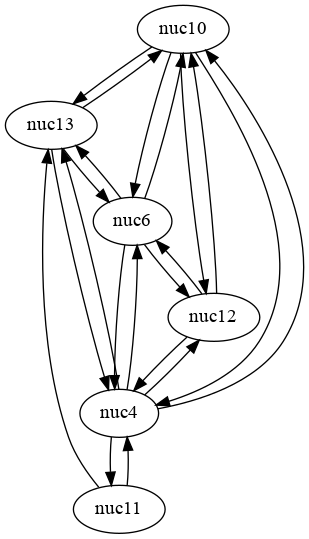

Frequency 5240


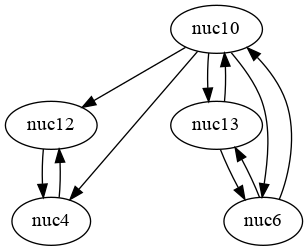

In [51]:
for freq in df_twist['freq'].unique():
    plt.figure()
    df = df_twist[freq == df_twist['freq']]
    
    G = nx.from_pandas_dataframe(
        df,
        'ap', 'sta',
        'signal',
        create_using=nx.DiGraph())
    print('Frequency {}'.format(freq))
    pos = nx.circular_layout(G)
    P = nx.nx_pydot.to_pydot(G)
    display.display(display.Image(P.create_png()))

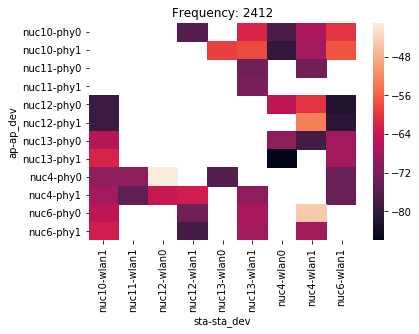

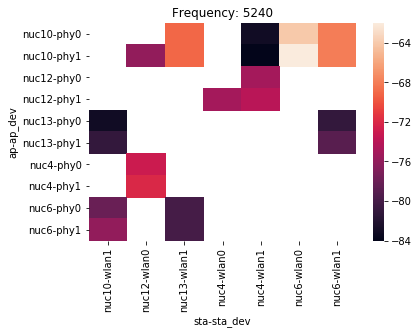

In [39]:
for freq in df_twist['freq'].unique():
    plt.figure()
    df = df_twist[freq == df_twist['freq']]
    signal = df.pivot_table(
        values='signal', index=['ap', 'ap_dev'], columns=['sta', 'sta_dev'])
    sns.heatmap(signal);
    plt.title('Frequency: {}'.format(freq))